# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
from __future__ import division
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# Display types of data in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [3]:
# look at data contained in the income column
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [4]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income']==">50K"])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income']=="<=50K"])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = float(n_greater_50k) / n_records * 100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


In [5]:
# Columns with data type object
object_columns = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']

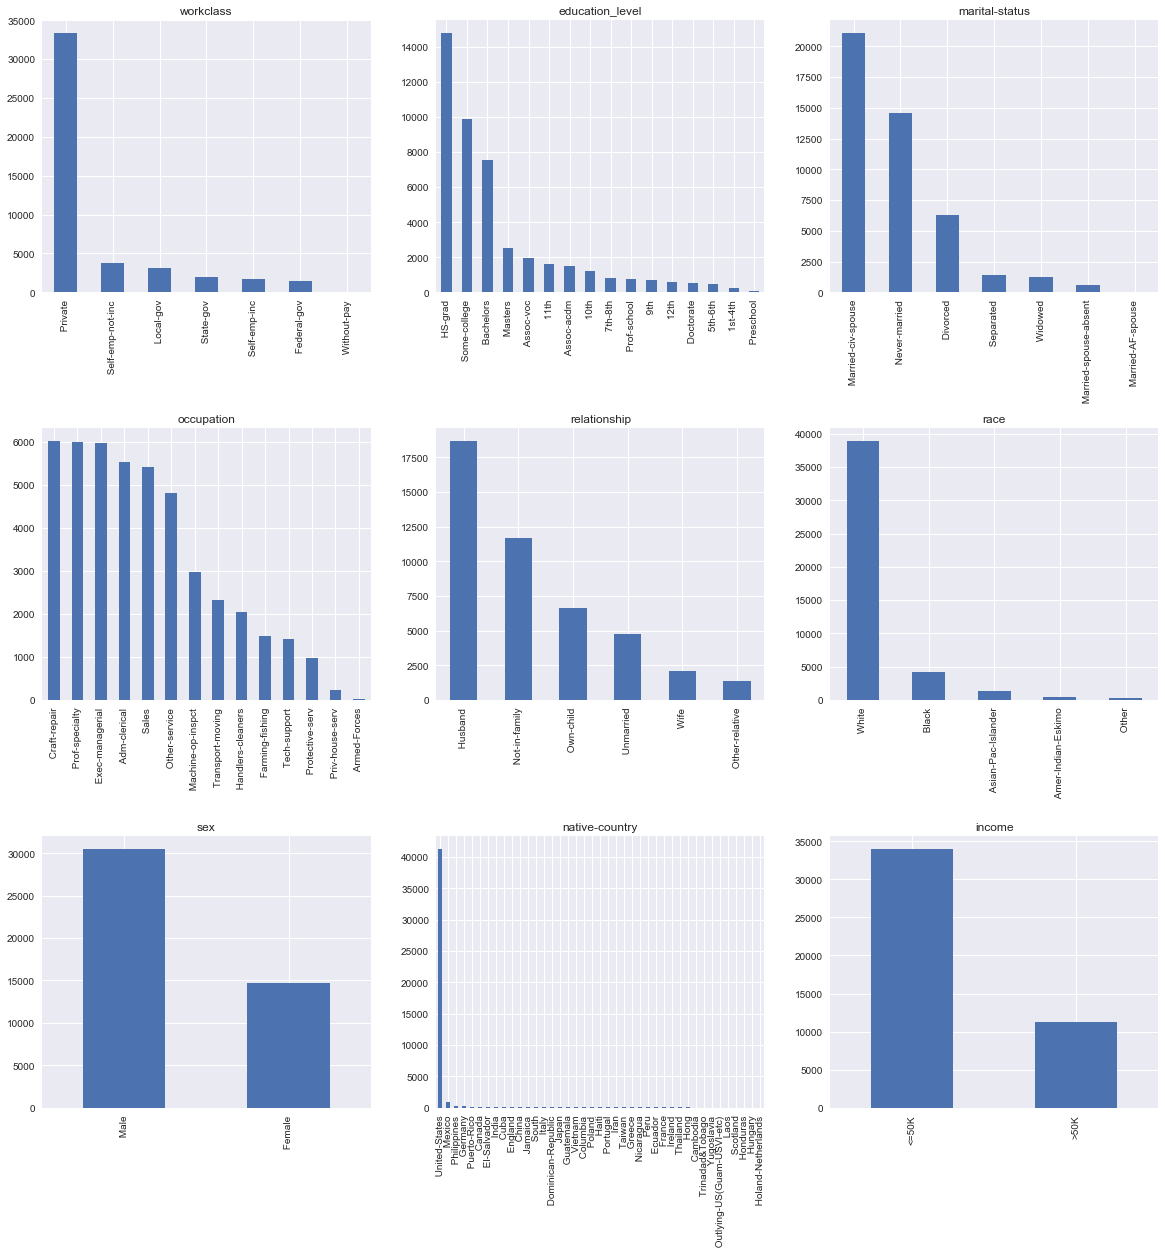

In [6]:
# Plot bar charts of object data columns
import matplotlib.pyplot as plt
import seaborn
% matplotlib inline

fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=.5)
for i in range(len(object_columns)):
    plt.subplot(3,3, i + 1);
    data[object_columns[i]].value_counts().plot(kind='bar');
    plt.title(object_columns[i])

In [7]:
# Columns with numerical data
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

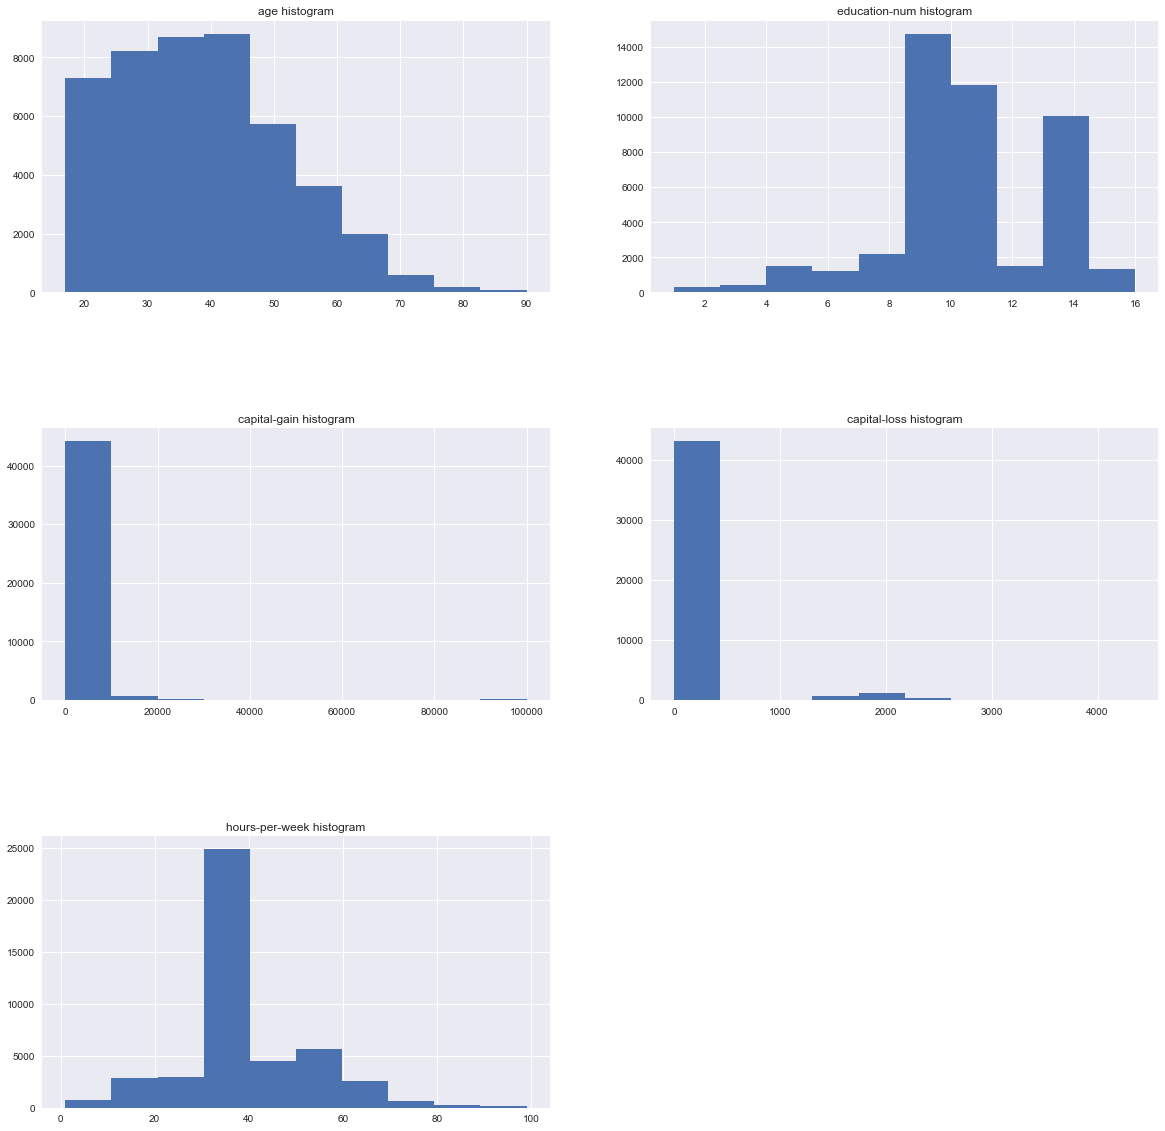

In [8]:
# Plot histograms of numerical data
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=.5)
for i in range(len(numerical_columns)):
    plt.subplot(3,2, i + 1);
    data[numerical_columns[i]].hist()
    plt.title(numerical_columns[i] + ' histogram')

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

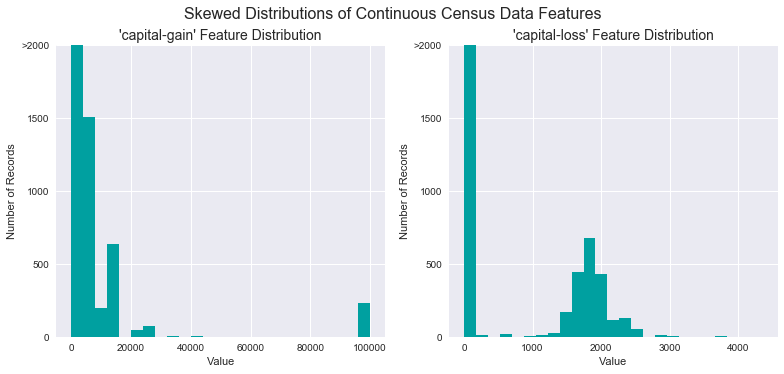

In [9]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

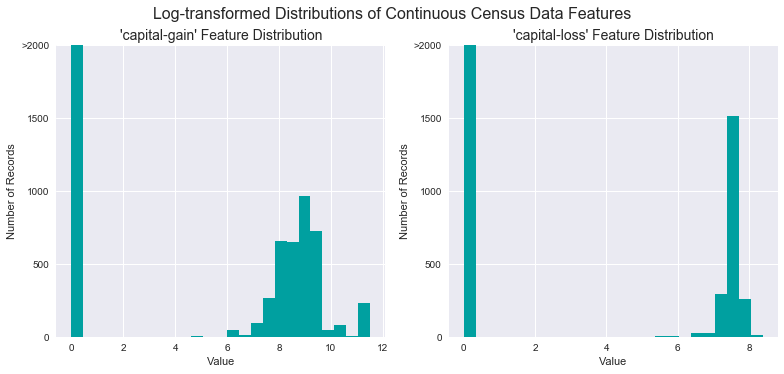

In [10]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [11]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [12]:
# TODO: One-hot encode the 'features_raw' data using pandas.get_dummies()
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
income = [1 if income_raw[i] == '>50K' else 0 for i in range(len(income_raw))]

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
# print encoded

103 total features after one-hot encoding.


In [13]:
# Find top correlations between features and income
from scipy.stats.stats import pearsonr
import operator

correlation_dict = {}

for feature in features.columns:
    correlation_dict[feature] = pearsonr(features[feature], income)

sorted_correlations = sorted(correlation_dict.items(), key=operator.itemgetter(1), reverse=True)

In [14]:
print('The top 6 positively correlated features with income are: ')
sorted_correlations[:6]

The top 6 positively correlated features with income are: 


[('marital-status_ Married-civ-spouse', (0.44619235419320097, 0.0)),
 ('relationship_ Husband', (0.40370575112875323, 0.0)),
 ('education-num', (0.33279987917625986, 0.0)),
 ('age', (0.237040235123711, 0.0)),
 ('hours-per-week', (0.22719914201811109, 0.0)),
 ('capital-gain', (0.22103380635452105, 0.0))]

In [15]:
print('The top 6 negatively correlated features with income are: ')
sorted_correlations[-6:]

The top 6 negatively correlated features with income are: 


[('relationship_ Unmarried', (-0.14726214680206706, 1.3121853434479065e-217)),
 ('occupation_ Other-service',
  (-0.16542774026370205, 7.7430940317100837e-275)),
 ('relationship_ Not-in-family', (-0.19556054210904164, 0.0)),
 ('sex_ Female', (-0.21576045786566475, 0.0)),
 ('relationship_ Own-child', (-0.22263547055937899, 0.0)),
 ('marital-status_ Never-married', (-0.3195358227861686, 0.0))]

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [16]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That being said, using that prediction would be pointless; If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [17]:
# TODO: Calculate accuracy
from collections import Counter

true_positives = Counter(income)[1]
accuracy = true_positives / len(income)

# TODO: Calculate F-score using the formula above for beta = 0.5
false_negatives = 0
false_positives = len(income) - true_positives

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

beta = 0.5

fscore = (1 + beta**2) * (precision * recall) / (((beta**2) * precision) + recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


**Answer**: The Naive Predictor that always predicts an individual makes more than \$50,000 has an accuracy of **0.2478** and a F0.5 score of **0.2917**. 

###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
- *What are the strengths of the model; when does it perform well?*
- *What are the weaknesses of the model; when does it perform poorly?*
- *What makes this model a good candidate for the problem, given what you know about the data?*

**Answer: ** The three supervised learning models I selected for this two-class classification application were: Support Vector Machine, K-Nearest Neighbors, and Gaussian Naive Bayes. To begin my research, I referred to the Scikit-learn [algorithm selection guide](http://scikit-learn.org/stable/tutorial/machine_learning_map/) and followed the path corresponding to the CharityML problem: >50 samples -> predicting a category -> labeled data -> <100K samples -> **SVC** -> not text data -> **KNeighbors Classifier** -> Ensemble Methods: **Random Forest**. 

The resources I consulted for determining the strengths and weaknesses of the different models were: 

[Supervised Machine Learning: A Review of Classification Techniques](https://datajobs.com/data-science-repo/Supervised-Learning-%5BSB-Kotsiantis%5D.pdf), a paper that gives an overview of the most common algorithms

A [Quora post written by Xavier Amatriain](https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms) about the advantages and disadvantages of a number of machine learning techniques. 

A [machine learning algorithm summary by Laura Hamilton](http://www.lauradhamilton.com/machine-learning-algorithm-cheat-sheet) that provides a short rundown of a few algorithms. 

Each of these algorithms has its own set of applications, advantages, and disadvantages that make it appropriate for the CharityML problem. 

1. **Support Vector Classifier** 
    + Strengths: non-linearly separable data can be separated through the use of the [kernel trick](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html), performs well with large number of features, robust to noise in input features
    + Weaknesses: slow to train with a large number of training examples, does not handle discrete data well, prone to overfitting because of high complexity, large number of model hyperparameters to optimize, SVM output parameters cannot be interpreted intuitively
    + Suitability: The CharityML problem is characterized by a large number of input features and the data may not be linearly separable. Therefore, a support vector machine classifier is well-suited to the task. 
    + Applications: Support Vector Machines have been employed in the financial industry to [forecast the performance of stocks](http://www.sciencedirect.com/science/article/pii/S0305048301000263)
    
2. **KNeighbors Classifier**
    + Strengths: "lazy" learner does not require any time to train but merely "memorizes" all of the training instances, simple to implement but effective at achieving high level of accuracy, not as prone to overfitting as SVC, deals well with non-linear data, robust to noisy data with appropriate selection of neighbors, able to handle large amounts of training data
    + Weaknesses: slow to predict classification of new instances, very sensitive to choice of distance function, does not perform as well on high dimensional datasets (data with a large number of features)
    + Suitability: The CharityML dataset is relatively large which means that it will be quick to train and tune a KNeighborsClassifier. Moreover, a kNN classifier can learn incrementally, meaning that new data points can be continuously added to the model without the need for re-training. Although the target labels are skewed in this case (i.e. there are many more instances classified as making less than 50K/year), kNN can adapt for skewed distributions through the use of weighted voting where certain classes are given a higher priority. The large number of features can also be addressed by using dimensionality reduction such as [Principal Component Analysis](https://onlinecourses.science.psu.edu/stat505/node/49). 
    + Applications: KNearest Neighbors classification has been used for [fault detection in the semiconductor manufacturing process](https://pdfs.semanticscholar.org/232f/cc0acdb8e713a7d44935cdae7b371193afea.pdf) resulting in reduced scrap and increased equipment run time. 
      
3. **Random Forest** (Ensemble Methods)
    + Strengths: handles non-linear data, handles mixed categorical and numerical input features, effective for large number of input features, effective for large number of training instances, can provide estimates of most important features in the classification, can balance error due to skewed class distributions
    + Weaknesses: can be prone to overfitting if there is a large amount of noise in the dataset, can be slow to train if the complexity of the decision trees is high
    + Suitability: The CharityML task features a large number of input features and non-linear data. Furthermore, the input features are a mix of categorical and numerical data and there are a large number of training instances. The Random Forest Classifier is well adapted to this task and will be able to provide feature importances as an additional benefit. 
    + Applications: Random Forests have been applied to [classify vehicles in a traffic characterization system](http://ieeexplore.ieee.org/document/6338719/?reload=true). The traffic application will help to create more intelligent road systems that can adapt in real-time to changing traffic flows and conditions.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [18]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


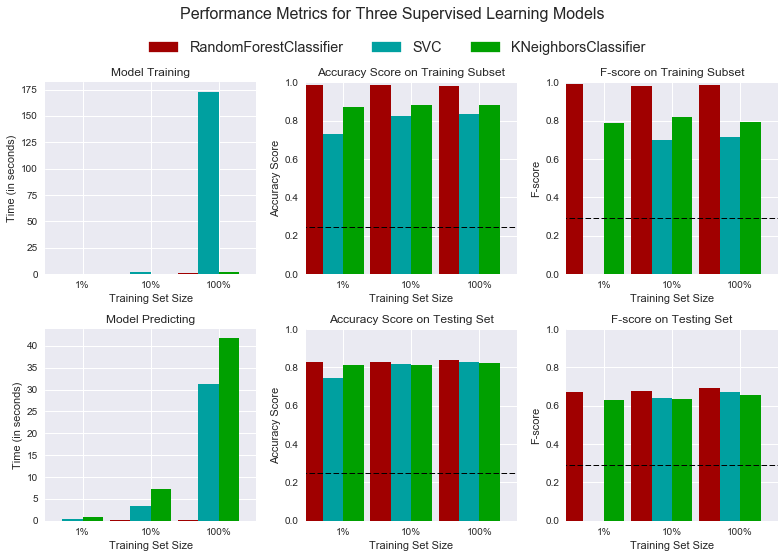

In [19]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# TODO: Initialize the three models
clf_A = SVC(random_state=42)
clf_B = KNeighborsClassifier() # no random state parameter with a KNN classifier
clf_C = RandomForestClassifier(random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(0.01 * len(X_train))
samples_10 = int(0.1 * len(X_train))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [20]:
import pprint
pp = pprint.PrettyPrinter()
pp.pprint(results)

{'KNeighborsClassifier': {0: {'acc_test': 0.81094527363184077,
                              'acc_train': 0.87333333333333329,
                              'f_test': 0.62905668541756821,
                              'f_train': 0.78796561604584525,
                              'pred_time': 0.8960001468658447,
                              'train_time': 0.0},
                          1: {'acc_test': 0.81260364842454391,
                              'acc_train': 0.8833333333333333,
                              'f_test': 0.63266557645134913,
                              'f_train': 0.82066869300911849,
                              'pred_time': 7.329999923706055,
                              'train_time': 0.032000064849853516},
                          2: {'acc_test': 0.82332780541735762,
                              'acc_train': 0.88,
                              'f_test': 0.65730565730565726,
                              'f_train': 0.79452054794520532,
                        

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: ** I would recommend that CharityML use the Random Forest Classifier to identify individuals that make more than \$50K per year. The Random Forest leads in all of the performance metrics, and considering the structure of the CharityML problem, it is the optimal algorithm. All of the algorithms record similar testing accuracy scores across the range of training set sizes with the Random Forest achieving the highest accuracy. In terms of the testing set F0.5 score, the Random Forest again achieves the highest performance for all sizes of the training set with the SVC and kNN Classifier slightly lower. As shown by the performance metrics, the main advantage of the Random Forest classifier is in the time to train and make predictions. When using the entire training set, the Random Forest Classifier is over 100 times faster to train than the SVC and makes predictions in about 1/30th the time. The kNN Classifier is also faster than the SVC when training as expected for a lazy learner, but it is still orders of magnitude slower than the Random Forest for both training and predicting. Given the size of the dataset, training time will be a significant factor in algorithm choice, and the Random Forest clearly is the winner in this category.  The characteristics of the CharityML problem also lends itself well to the capabilities of the Random Forest Classifier. The input features are binary, categorical, and numerical, all of which can be handled by the Random Forest (even without scaling, although in this case the data has been scaled for evaluating the other algorithms). Moreover, Random Forests perform feature selection implicitly in the decision trees and the number of features considered by decision trees in the forest can be controlled through the max_features parameter. Therefore, Random Forests are great for datasets not only with a large number of instances, but also with a large number of input features.  Random Forests can also provide the feature importances which will be helpful if CharityML would like to determine what variables are the most indicative of an individual making more than 50K. Finally, the labels in the dataset are skewed (there are more individuals making less than $50,000) and Random Forests can account for unbalanced class proportions in a dataset. 

There is one major caveat about the Random Forest shown by the performance metrics. The extremely high accuracy and F0.5 scores (near 100\%) recorded by the Random Forest on the training set is an indicator that the algorithm is overfitting and essentially memorizing the training data. This is a common problem in machine learning, but it can be addressed through parameter tuning, cross validation, and through the collection of more data. In particular, the min_samples_split hyperparameter of the Random Forest can be increased to simplify the underlying decision trees' complexity and address overfitting. Moreover, when performing Grid Search, I will use cross-validation in order to prevent the classifier from simply memorizing the training set. Cross validation splits the training set into k subsets (called folds), trains the classifer on k-1 of these subsets, tests the classifier on the kth subset, repeats this procedure k times, and averages the scoring metric over the k iterations to arrive at a single score to determine the performance of the classifier. Cross validation can be used with Grid Search when tuning the hyperparameters of the algorithm to arrive at the best combination of algorithm "settings" that can generalize to new instances. Moreover, if CharityML collects more training data, the  tendency of the classifier to overfit will decrease as shown in the performance metrics. As the number of training instances increases, the training performance metrics decrease and the testing performance metrics increase. Additional data will also tend to increase the performance of all classifiers on the data as evidenced by the paper ["The Unreasonable Effectiveness of Data"](http://clair.si.umich.edu/si767/papers/Week06/TextRepresentation/Halevy.pdf). In summary, the unoptimized Random Forest does demonstrate overfitting at this point, but with suitable hyperparameter tuning incorporating cross validation, the overfitting can be minimized and the performance of the classifier can be maximized. 

### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: ** The final model we are using is called a Random Forest. It is composed of many (100 in this case) simpler models known as Decision Trees. The Random Forest is an ensemble method which operates on the idea that if one simple model is good, than a group of many simple models combined together will be even better. The difference between a single Decision Tree and a Random Forest is like the difference between asking one human analyst to make a prediction about the income of an individual versus polling 100 analysts and averaging all of the predictions to form one final answer. Any one individual analyst may be biased or overlook an important attribute of an individual, but in aggregate, all of the individual variability will be smoothed out and the final prediction will be more accurate. I will explain how a single Decision Tree works, and just keep in mind that our model will use 100 of these trees and then essentially take a vote to arrive at the final answer. Each Decision Tree is first created without knowing anything about our problem. The learning in machine learning happens when we train the model using the historical census data that is publically available. The dataset is composed of characteristics about each individual, known as features, and a target category or label, which in our case is whether or not that person made more than \$50,000/year. The characteristics are the fields from the census data such as education, occupation, and marital status among others. What the Decision Tree does is that it looks through the set of the characteristics for an individual and tries to find the relationships between the characteristics and the income class of that individual. In other words, it tries to create a representation of an individual who would make more than \$50,000 and an individual who would make less. It does this for all of the instances, or individuals, in the dataset until it comes up with an accurate idea of what an individual making more than \$50,000 looks like in terms of the given set of features. The Decision Tree forms this representation as a sequence of yes/no questions that form a flowchart that allow the model to then predict whether a new individual (provided in the form of a set of characteristics) is more likely to fall into the greater than \$50K income category or the less than \$50K category.

In order to evaluate the performance of our model, before we let the Decision Tree look at the entire dataset, we split the data into a training and a testing set. The Decision Tree is allowed to look at all of the training data (both features and labels) and this is when the learning, or the creation of the tree, occurs. We then show the Decision Tree only the features of the testing set and allow the Decision Tree to decide which income group an individual fits into. For each new individual, again, given as a set of features, the Decision Tree works its way through the flowchart of questions it created in the training phase and moves farther and farther down the tree. Eventually, the Decision Tree runs out of questions to ask about the features and reaches the end of a branch. The end of the branch will correspond to one of the two groups that we are trying to identify, and the model will output the class of the individual.To assess the performance of the Decision Tree, we then look at all of the predictions made on the test individuals and compare those to the testing labels, which are the correct classifications that we knew ahead of time but never showed to the model. We can improve the performance of our model either by feeding it more training data or by adjusting the settings (known as hyperparameter tuning). Once we are satisfied with our model, we can implement it on real-world up-to-date data. This is the exciting bit but also slightly anxiety-inducing! We allow our model to make predictions for individuals where we *do not know the answer* ahead of time. In order to improve the donation rate to CharityML, we plan on giving the model a set of descriptive characteristics (taken from publically available data) about a set of potential donors. The model will place each individual into either the greater than \$50K group or the less than \$50K group. Based on the class prediction for each individual, we will or will not send them mail asking for donations. We believe that this machine learning model will be a great benefit to our organization because it will allow us to automatically screen potential donors with rapid speed and high accuracy. It will improve CharityML's operations, in terms of reduced costs to find likely donors; the individuals in the population that would turn us down will never have to hear from us; and of course, the individuals whom our charity supports will benefit from increased donation levels. Machine learning can often seem like a buzzword, but our model demonstrates the ability of machine learning to positively impact society through the construction of efficient systems. 

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [21]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune
parameters = [
    { 'criterion': ['gini', 'entropy'], 'n_estimators': [10, 100], 'min_samples_split': [2, 4, 8], \
     'max_features': ['auto', 'log2', 0.5, None], 'max_depth':[None, 2, 20] }
]

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer, cv=3, n_jobs=-1)

# TODO: Fit the grid search object to the training data and find the optimal parameters

start=time()
grid_fit = grid_obj.fit(X_train, y_train)
end=time()

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and optimized models
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print('Total parameter tuning time : {:.2f}s'.format(end-start))

Unoptimized model
------
Accuracy score on testing data: 0.8404
F-score on testing data: 0.6936

Optimized Model
------
Final accuracy score on the testing data: 0.8637
Final F-score on the testing data: 0.7586
Total parameter tuning time : 1024.27s


In [22]:
start = time()
best_clf.fit(X_train, y_train)
end = time()
best_clf_training_time = end - start

In [23]:
best_clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [24]:
more_trees_clf = RandomForestClassifier(bootstrap=True,
 class_weight=None,
 criterion='entropy',
 max_depth= 20,
 max_features='auto',
 max_leaf_nodes=None,
 min_impurity_split=1e-07,
 min_samples_leaf=1,
 min_samples_split=4,
 min_weight_fraction_leaf=0.0,
 n_estimators=1000,
 n_jobs=-1,
 oob_score=False,
 random_state=42,
 verbose=0,
 warm_start=False)

start = time()
more_trees_clf.fit(X_train, y_train)
end = time()
more_trees_training_time = end - start

In [25]:
best_clf_test_pred = best_clf.predict(X_test)
best_clf_train_pred = best_clf.predict(X_train)

more_trees_test_pred = more_trees_clf.predict(X_test)
more_trees_train_pred = more_trees_clf.predict(X_train)

print "\nGrid Search Optimized Model\n------"
print("Accuracy on the testing data: {:.4f}".format(accuracy_score(y_test, best_clf_test_pred)))
print("F0.5 score on the testing data: {:.4f}".format(fbeta_score(y_test, best_clf_test_pred, beta=0.5)))
print("Accuracy on the training data: {:.4f}".format(accuracy_score(y_train, best_clf_train_pred)))
print("F0.5 score on the training data: {:.4f}".format(fbeta_score(y_train, best_clf_train_pred, beta=0.5)))
print("Training time: {:.2f}".format(best_clf_training_time))

print "\nMore Trees Model\n------"
print("Accuracy on the testing data: {:.4f}".format(accuracy_score(y_test, more_trees_test_pred)))
print("F0.5 score on the testing data: {:.4f}".format(fbeta_score(y_test, more_trees_test_pred, beta=0.5)))
print("Accuracy on the training data: {:.4f}".format(accuracy_score(y_train, more_trees_train_pred)))
print("F0.5 score on the training data: {:.4f}".format(fbeta_score(y_train, more_trees_train_pred, beta=0.5)))
print("Training time: {:.2f}".format(more_trees_training_time))


Grid Search Optimized Model
------
Accuracy on the testing data: 0.8637
F0.5 score on the testing data: 0.7586
Accuracy on the training data: 0.8907
F0.5 score on the training data: 0.8112
Training time: 6.89

More Trees Model
------
Accuracy on the testing data: 0.8648
F0.5 score on the testing data: 0.7611
Accuracy on the training data: 0.8917
F0.5 score on the training data: 0.8126
Training time: 32.63


In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, best_clf_test_pred)

array([[6415,  330],
       [ 903, 1397]])

In [27]:
confusion_matrix(y_test, more_trees_test_pred)

array([[6418,  327],
       [ 896, 1404]])

### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: |
| Accuracy Score |       0.2478        |      0.8444       |     0.8637      |
| F-score        |       0.2917        |      0.7030       |     0.7577      |

#### Further Optimization
|       Metric        | Optimized Model |More Trees Model |
| :-----------------: | :-------------: | :-------------: |
| Test Accuracy Score |     0.8637      |     0.8648      |
| Test F-score        |     0.7577      |     0.7611      |
| Train Accuracy Score|     0.8907      |     0.8917      |
| Train F-score       |     0.8112      |     0.8126      |
| Training Time       |     6.89 s      |     32.63 s     |

**Answer: ** The accuracy of the final model after optimization is **0.8637** and the F0.5 score is **0.7577**. Both of the performance metrics for the final model were higher than the unoptimized model, and both of the models outperformed the benchmark predictor by a significant margin. Optimization improved the accuracy of the model by 2.29% and the F0.5 score by 7.78%. The time to tune the model hyperparameters was significant at more than 17 minutes, but this procedure will only need to be done once. Further work could be done to improve the metrics by increasing the number of estimators and the minimum samples required to split a node, although caution should be taken to avoid creating too complex of a model that results in overfitting the training data. There will always exist a trade-off between time and performance, and in an industry setting, hyperparameter tuning could be carried out with multiple classifiers and larger parameter grids to arrive at the optimally configured model. 

Examining the parameters for the optimized Random Forest, I observed that the n_estimators, or the number of decision trees trained by the Random Forest, was optimized at 100. However, this might not be the true ideal value for number of estimators as it was only the highest value that I alloted in the parameter grid. Therfore, I wanted to figure out if I could improve the performance of the forest by setting a higher number of trees in the model parameters. I created a Random Forest with an order of magnitude increase in the number of trees and assessed its performance on the testing data. I also measured the performance of the optimized model and the more trees model on the training dataset to determine the extent of overfitting. Finally, I measured the time to train both models to examine the trade off between increasing model performance and increasing training time of the model. The results are summarized in the Further Optimization table. The most critical feature to note is that while the performance metrics of both models on the training set are elevated compared to the testing set, they are not as high as those from the unoptimized Random Forest. This means that the amount of overfitting has decreased after performing the parameter optimization using cross validation in the Grid Search. As the overfitting has decreased, the model is now better able to generalized to new cases and should record better performance when deployed in a real world application. Overall, the More Trees model achieves slightly higher performance metrics, although at a significant cost in increased training time. Examining the confusion matrices for both models on the testing data, the more trees model has 3 more true negatives, 7 more true positives, 7 fewer false negatives, and 3 fewer false positives than the optimzed model. This increase in performance comes at a nearly 5-fold increase in training time. For CharityML's purposes, the reduction in false positives might well be worth the training time increase, but for different applications, the cost/benefit analysis might not be in favor of further optimization. It is evident that at this point in the model preparation, there is a [diminishing return](https://en.wikipedia.org/wiki/Diminishing_returns) to parameter optimization. Initial adjustments to the algorithm settings resulted in substantial improvements on the performance metrics, but subsequent fine-tuning results in smaller and smaller increases in accuracy and F0.5 score. At this point, CharityML would likely be better off spending resources on collecting more data rather than tuning the algorithm. More data can both improve the model and reduce the chances of overfitting, and as the amount of training data increases, the [algorithm tuning has less of an effect on performance](http://www.kdnuggets.com/2015/06/machine-learning-more-data-better-algorithms.html) (as long as the quality of the data is high). In summary, parameter tuning can significantly improve the performance of a classifier, but optimization can only go so far, and it is the quality of the data that will determine the success of any machine learning model. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier. In the next python cell fit this classifier to the training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:** My prediction for the 5 most important features in order are as follows:
1. Education Level
2. Education Number
3. Age
4. Occupation
5. Marital Status

My reasoning for education level as the most important feature is that education has been shown to [have a positive correlation with income](https://www.nytimes.com/2014/09/11/business/economy/a-simple-equation-more-education-more-income.html). Even as the cost of college increases, the return on investment from post-secondary education [is as great as 17.6% annually] which beats nearly any other investment over the same time period. (http://www.economist.com/news/united-states/21600131-too-many-degrees-are-waste-money-return-higher-education-would-be-much-better) (I am genuinely curious what the return on a Udacity nanodegree is; does Udacity have any internal metrics on this?) The same justification follows for Education Number as the number 2 predictive feature. I think that education level is more relevant to income prediction than the precise number of years od education because in terms of career income, the difference between a college degree and a high school degree is much larger than that between say 3 or 2 years of high school. My reasoning for the next attribute, age, is that as an individual ages and accumulates more experience in a field, they tend to earn a higher income. For occupation, there clearly exists substantial differences in salary between workers in disparate fields. However, even within one occupation, there are considerable differences in income related to age or whether the individual is in the public sector (government work) or the private sector which could result in noisy data which would reduce the predictive power of this variable. From personal experience, as an aerospace engineering intern with NASA, I earned only \$15/hour while an intern at Boeing doing the exact same work would be rolling in \$30/hour. Finally, marital status could be predictive of income level because individuals may wait to get married until they are earning enough to be able to support a family. Thus, I would expect married individuals to have higher income levels than those who are not married. Of course, there are many nuances when it comes to predicting humans and although they seem intuitive to me, I do not have 100% confidence in my predictions. I, for one, am more than comfortable handing off the job of characterizing humans to the machines!

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

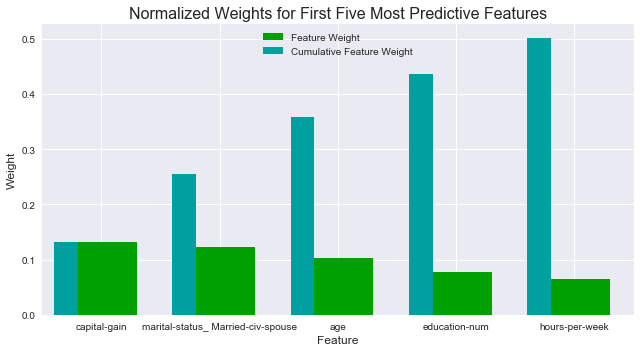

In [28]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone

# TODO: Train the supervised model on the training set 
model = clone(best_clf)

start = time()
model.fit(X_train, y_train)
end = time()

complete_training_time = end - start
# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

In [29]:
print('The top 6 positively correlated features with income are: ')
sorted_correlations[:6]

The top 6 positively correlated features with income are: 


[('marital-status_ Married-civ-spouse', (0.44619235419320097, 0.0)),
 ('relationship_ Husband', (0.40370575112875323, 0.0)),
 ('education-num', (0.33279987917625986, 0.0)),
 ('age', (0.237040235123711, 0.0)),
 ('hours-per-week', (0.22719914201811109, 0.0)),
 ('capital-gain', (0.22103380635452105, 0.0))]

**Answer:** Above, I printed out the top 6 most highly correlated features with income for reference.  
The five features selected by the classifier as having the greatest relevance to predicting income class are:
1. Hours per Week
2. Education Number
3. Age
4. Marital Status
5. Capital Gain 

I predicted 2., 3., and 4. in my top 5 but missed the Hours per Week and Capital Gain features. Nonetheless, thinking about it after the model has run, I can see how all of these features would be useful in predicting the income class of an individual. The most important variable returned by the classifier was hours per week, which also appears in the top 6 positively correlated features with income. As the number of hours worked per week increases, the income of an individual tends to increase as well. Research, including a [regression analysis of income with hours worked per week](https://smartech.gatech.edu/bitstream/handle/1853/53299/Regression_Analysis_of_the_Relationship_between_Income_and_Work_Hours-1.pdf), does suggest that the strength of the relationship decreases as income rises and, that past a certain income threshold, the number of hours worked per week decreases. However, this affects only a small part of the workforce, and the larger trend, as evidenced by the positive correlation coefficient, is one of increasing income with greater number of hours worked per week. The second through fourth features from the classifier all intuitively make sense as discussed previously. One interesting note is that for the Marital Status feature, the one category in particular that was deemed to be of high importance by the classifier was married-civ-spouse.  This was the highest correlated feature with income when I explored all the correlations between features and income class. Finally, number 5, Capital Gains, also makes sense because [Capital Gains](http://www.investopedia.com/terms/c/capitalgain.asp) come from the increase in value of an investment, and those individuals who hold investments tend to be wealthier. This is just one example of the [unequal distribution of wealth in the United States](https://en.wikipedia.org/wiki/Wealth_inequality_in_the_United_States) where those with more wealth in the first place tend to accumulate more wealth over their lifetime (almost as if money has its own special form of gravity that attracts more money). Overall, the most importance features returned by the classifier are in agreement with the top 6 most positively correlated features with income. This suggests that one approach to reduce the training time of the algorithm would be to examine the highly correlated features before training and select several of those rather features rather than the entire dataset. Sometimes machine learning can seem like a "[black box](https://jvns.ca/blog/2016/04/10/why-i-dont-like-black-boxes/)", but in this case, the most important features intuitively make sense and it is possible to see that looking at only a select few of the census data features should be necessary to make accurate predicts of income. 

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [30]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
start = time()
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
end = time()
reduced_training_time = end - start
# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print('Time to train: {:.2f}'.format(complete_training_time))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))
print('Time to train: {:.2f} '.format(reduced_training_time))

Final Model trained on full data
------
Accuracy on testing data: 0.8637
F-score on testing data: 0.7586
Time to train: 6.94

Final Model trained on reduced data
------
Accuracy on testing data: 0.8385
F-score on testing data: 0.6921
Time to train: 3.36 


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:** The final model trained on only the five most important features recorded F0.5 and accuracy scores slightly lower than that of the model trained on the entire featureset. An interesting point is that the model trained on only the five most important features outperforms the unoptimized model trained on all the input features. If training time of the model was an issue, I would recommend to CharityML that using the most important features would be an acceptable tradeoff in terms of time versus performance. The accuracy of the model  decreased by 2.92% and the F0.5 score decreased by 8.76% while the time to train was reduced by 52.48%. For an industry-sized application with hundreds of thousands or millions of instances and potentially thousands of features, selecting only the most important features could be a worthwhile decision. However, for a Random Forest that only needs to be trained once (or trained periodically with additional data), the decrease in time from excluding features may not outweigh the decrease in performance. The ultimate choice would depend on how important accuracy (or the appropriate performance metric) is relative to training time and the exact characteristics of the problem, but feature engineering, including dimensionality reduction through principal component analysis, and/or new feature creation should definitely be considered in any machine learning application. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.